# OreSat Wedge Clamp Calulations

The following is a document outlining the calculations used for optimizing the OreSat card clamp design.

### Screw Clamping Force

Fundametnally, the Clamping Force can be determined with a simple equation:

T = KDP
 
T = Torque (in-lb)
K = Constant to account for friction 
D = Bolt diameter (inches)
P = Clamping Force (lb)

However, these caluclations exclude numerous other areas where friction is present as an opposing force. The values from these calcualtions are exceedingly exagegerated and therefore must have frication values removed from the calulations. Using this simplified equation to calculate the clamping force would excede 2000N for an M2 bolt, which is VERY innacurate.

K = {[0.5 p/p]   +   [0.5 mt (D – 0.75 p sin a)/sin a]   +   [0.625 mc D]}/D  

This equation (from Shigley, Mechanical Engineering Design, 5 ed., McGraw-Hill, 1989, p. 346, Eq. 8-19) provides us with a more accurate calulation of the force by taking into account the friction from the helical angle of the fastener

REFERENCE: [Stack Exchange](https://engineering.stackexchange.com/questions/8324/calculation-of-clamping-force-from-bolt-torque)


In [5]:
import numpy as np

#Basic Variables
screwBoltDiameter = 0.0594173228 #inches
torqueSpec = 25 #inch-lbs

#Variables for Friction Calculation
threadPitch = 0.015748 #inches
threadFrictionCoefficient = 1
boltShankDiameter = 0.0787402 #inches
threadProfileHalfAngle = 60/2 #degrees
collarFrictionCoefficient = 1

#Friction Calculation
frictionConstant = ((0.5*threadPitch/threadPitch) + (0.5*threadFrictionCoefficient*(boltShankDiameter - 0.75*threadPitch * np.sin(threadProfileHalfAngle))/np.sin(threadProfileHalfAngle)) + (0.625*collarFrictionCoefficient*boltShankDiameter))/boltShankDiameter

#Clamping Force Calculation
clampingForce = torqueSpec/(screwBoltDiameter*frictionConstant)

print("Clamping Force =", clampingForce, "N")

Clamping Force = 65.80492017835586 N


### Mechanical Advantage of the Wedge

Depending angle of the  

<center><img src="figures/forceDiagram.png" alt="forceDiagram" style="width:150px;" /><center/>

However, the travel of the wedge must be taken into account when deciding the angle to be utilized. Lesser travel means less mechanical advantage, however reduces the travel of the bolt and therefore reduces galling that occurs between the M2 button head and the anodized aluminum surface.

This can be generalized by analyzing the effect of wedge angle on the force applied to the OreSat cards.

Text(0, 0.5, 'Vertical Travel (mm)')

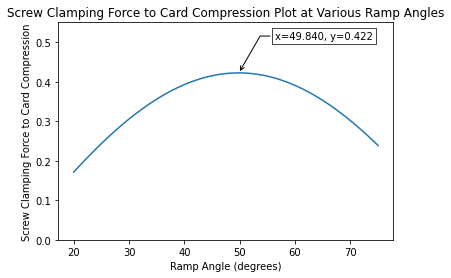

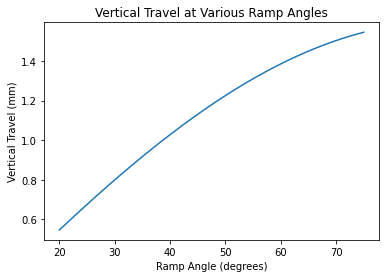

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Set Variables for Screw to Card Compression Plot
frictionCoefficientAl = 0.17
X = np.linspace(20, 75, 1000)
forceOfFriction = np.cos(np.deg2rad(X))*frictionCoefficientAl
Y = (np.sin(np.deg2rad(X))-forceOfFriction)*np.cos(np.deg2rad(X))

fig, ax = plt.subplots()
ax.plot(X, Y)
plt.ylim([0, .55])
plt.title("Screw Clamping Force to Card Compression Plot at Various Ramp Angles")
plt.xlabel("Ramp Angle (degrees)")
plt.ylabel("Screw Clamping Force to Card Compression")

#Labeling Maximum Value
def annot_max(X,Y, ax=None):
    xmax = X[np.argmax(Y)]
    ymax = Y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(X,Y)

#Set Variables for Vertical Travel Plot
horizontalTravel=1.6

X1 = np.linspace(20, 75, 1000)
Y1 = np.sin(np.deg2rad(X))*horizontalTravel

fig, ax = plt.subplots()
ax.plot(X1, Y1)
plt.title("Vertical Travel at Various Ramp Angles")
plt.xlabel("Ramp Angle (degrees)")
plt.ylabel("Vertical Travel (mm)")